# Proyek 2 ML Terapan, Sistem Rekomendasi Movie (Film)
- **Nama:** [Riffa Bella Wahyu S]
- **Email:** [mc444d5x0776@student.devacademy.id]
- **ID Dicoding:** [MC444D5X0776]

## Business Understanding

- **Problem Statements :**
  1.   Dengan data rating yang dimiliki, bagaimana perusahaan dapat merekomendasikan movie (film) lain yang mungkin disukai dan belum pernah dibaca oleh pengguna?

  2.   Bagaimana cara membangun sistem yang mampu merekomendasikan 10 film terbaik bagi setiap pengguna berdasarkan preferensi pribadi mereka, menggunakan data historis rating film?

- **Goals :**
  1. Menghasilkan sejumlah rekomendasi movie yang sesuai dengan preferensi pengguna dan belum pernah dibaca sebelumnya dengan teknik collaborative filtering

  2. Memberikan daftar 10 rekomendasi film teratas untuk setiap pengguna, berdasarkan preferensi historis mereka.

## Import Library yang Digunakan

In [1]:
import pandas as pd # untuk manipulasi dan analisis data
import numpy as np # untuk melakukan perhitungan numerik
from zipfile import ZipFile # mengimpor class ZipFile dari modul zipfile
import tensorflow as tf # mengimpor library TensorFlow dan memberi alias tf
from tensorflow import keras # mengimpor modul keras dari library TensorFlow untuk membangun dan melatih model neural network.
from tensorflow.keras import layers # mengimpor modul layers dari library Keras untuk membangun model deep learning
from pathlib import Path # mengimpor kelas Path dari modul pathlib untuk mengelola dan memanipulasi path
import matplotlib.pyplot as plt # untuk visualisasi grafik
import seaborn as sns # untuk visualiasi data

## Data Understanding

Pada proyek ini menggunakan dataset dari [Kaggle - Movie Recommendation System](https://www.kaggle.com/datasets/sumuduchamika/movie-recommendation-system) berisi 3 file, yaitu movie, demografi, dan rating.

In [2]:
# Import module yang disediakan google colab untuk kebutuhan upload file

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bellawahyu","key":"c8717390016d24e448984bcd4d2a94dc"}'}

In [3]:
# Mengambil dan mendownload dataset dari kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Mengambil dan mendownload dataset dari Kaggle
!kaggle datasets download -d mukeshmanral/movielens-rating-dataset

Dataset URL: https://www.kaggle.com/datasets/mukeshmanral/movielens-rating-dataset
License(s): unknown
  0% 0.00/867k [00:00<?, ?B/s]
100% 867k/867k [00:00<00:00, 875MB/s]


In [4]:
# Mengekstrak file zip
!unzip /content/movielens-rating-dataset.zip

Archive:  /content/movielens-rating-dataset.zip
  inflating: movie_info.csv          
  inflating: ratings.csv             
  inflating: user_demographics.csv   


In [6]:
# Membaca dataset
movie = pd.read_csv('/content/movie_info.csv', on_bad_lines='skip', quoting=3)
rating = pd.read_csv('/content/ratings.csv', on_bad_lines='skip', quoting=3)
demografi = pd.read_csv('/content/user_demographics.csv', on_bad_lines='skip', quoting=3)

# Menghitung jumlah data unik
print('Jumlah data movie ', len(movie['movie id'].unique()))  # Menggunakan movie_id sebagai ID movie
print('Jumlah data penilaian yang diberikan pengguna: ', len(rating['user_id'].unique()))  # Pengguna yang memberikan rating
print('Jumlah data demografi pengguan: ', len(demografi['user_id'].unique()))  # demografi pengguna

Jumlah data movie  1271
Jumlah data penilaian yang diberikan pengguna:  943
Jumlah data demografi pengguan:  943


Insight:

Pada dataset Book Recommendation, terdiri dari 3 file sebagai berikut:
- data movie (film), yang memilki jumlah data film unik sebanyak 1271
- data rating (penilaian). yang memiliki jumlah data film yang dinilai sebanyak 943
- data demografi pengguna, yang memiliki jumlah data pengguna sebanyak 943

## Univariate Exploratory Data Analysis

**Variabel-variabel pada Rekomendasi Buku :**
- Movie : merupakan informasi film, berisi movie id, movie title, release date, dan genre film (unknown, action, adventure, animation, children's, comedy, crime, documentary, drama, fantasy, film-noir, horor, musical, mystery, romance, Sci-Fi, Thriller, War, dan Western)
- Rating : merupakan informai penilaian atau rating yang diberikan oleh pengguna. Yang berisi user_id, movie_id, rating, dan unix_timestamp.
- Demografi Pengguna : merupakan informasi tentang pengguna yang berisi user_id, age, gender, occupation, dan zip code.

In [7]:
# Melihat jumlah baris dan kolom masing-masing file pada dataset
print(f"jumlah baris dataset movie {movie.shape[0]}, dan jumlah kolom movie {movie.shape[1]}")
print(f"jumlah baris dataset rating {rating.shape[0]}, dan jumlah kolom rating {rating.shape[1]}")
print(f"jumlah baris dataset demografi {demografi.shape[0]}, dan jumlah kolom demografik {demografi.shape[1]}")

jumlah baris dataset movie 1271, dan jumlah kolom movie 22
jumlah baris dataset rating 100000, dan jumlah kolom rating 4
jumlah baris dataset demografi 943, dan jumlah kolom demografik 5


### Movie

In [8]:
# Menampilkan jumlah baris dan kolom dalam dataset serta jenis data di setiap kolom (numerikal atau kategorikal).
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1271 entries, 0 to 1270
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1271 non-null   int64 
 1   movie title   1271 non-null   object
 2   release date  1270 non-null   object
 3   unknown       1271 non-null   int64 
 4   Action        1271 non-null   int64 
 5   Adventure     1271 non-null   int64 
 6   Animation     1271 non-null   int64 
 7   Children's    1271 non-null   int64 
 8   Comedy        1271 non-null   int64 
 9   Crime         1271 non-null   int64 
 10  Documentary   1271 non-null   int64 
 11  Drama         1271 non-null   int64 
 12  Fantasy       1271 non-null   int64 
 13  Film-Noir     1271 non-null   int64 
 14  Horror        1271 non-null   int64 
 15  Musical       1271 non-null   int64 
 16  Mystery       1271 non-null   int64 
 17  Romance       1271 non-null   int64 
 18  Sci-Fi        1271 non-null   int64 
 19  Thrill

In [9]:
# Mengubah nama kolom pada file movie
movie.rename(columns={'movie id':'movie_id','movie title':'movie_title', 'release date':'release_date', 'Children\s':'Childrens'},inplace=True)

In [10]:
# Menampilkan 5 baris pertama dari dataframe movie
movie.head()

,movie_id,movie_title,release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-95,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-95,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-95,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-95,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


Insight:

Pada data movie, terdiri dari 1271 baris dan 22 kolom, dengan 2 kolom kategorikal yaitu kolom movie title, dan release data. Kemudian terdapat 20 kolom numerik yaitu 1 kolom movie id, dan 19 kolom genre (unknown, action, adventure, animation, children's, comedy, crime, documentary, drama, fantasy, film-noir, horor, musical, mystery, romance, Sci-Fi, Thriller, War, dan Western). Kemudian informasi yang ditampilkan juga menandakan bahwa setiap film dapat memiliki lebih dari 1 genre.

In [11]:
# Menampilkan informasi unik kolom Movie Title
print('Banyak judul film: ', len(movie.movie_title.unique()))
print('Judul film: ', movie.movie_title.unique())

Banyak judul film:  1257
Judul film:  ['Toy Story (1995)' 'GoldenEye (1995)' 'Four Rooms (1995)' ...
 'B. Monkey (1998)' 'You So Crazy (1994)'
 'Scream of Stone (Schrei aus Stein) (1991)']


#### Pengecekan MIssing Value

In [14]:
# Pengecekan Missing Value data Movie
print(movie.isnull().sum())

movie_id        0
movie_title     0
release_date    1
unknown         0
Action          0
Adventure       0
Animation       0
Children's      0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64


Insight pada pengecekan missing value, terdapat 1 nilai kosong pada kolom release_date. Sehingga perlu dilakukan pengisian data pada proses preprocessing.

### Demografi Pengguna

In [13]:
# Menampilkan jumlah baris dan kolom dalam dataset serta jenis data di setiap kolom (numerikal atau kategorikal).
demografi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   sex         943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [15]:
# Mengubah nama kolom pada file user
demografi.rename(columns={'sex':'gender'},inplace=True)

In [16]:
# Menampilkan 5 baris pertama dari dataframe demografi
demografi.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [17]:
# Menampilkan informasi pengguna, yang memberikan informasi pekerjaan mereka
print('Banyak pengguna: ', len(demografi.user_id.unique()))
print('Bekerja sebagai apa: ', demografi.occupation.unique())

Banyak pengguna:  943
Bekerja sebagai apa:  ['technician' 'other' 'writer' 'executive' 'administrator' 'student'
 'lawyer' 'educator' 'scientist' 'entertainment' 'programmer' 'librarian'
 'homemaker' 'artist' 'engineer' 'marketing' 'none' 'healthcare' 'retired'
 'salesman' 'doctor']


In [19]:
# Menampilkan statistik deskriptif dari DataFrame demografi
demografi.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


#### Pengecekan Missing Value

In [20]:
print(demografi.isnull().sum())

user_id       0
age           0
gender        0
occupation    0
zip_code      0
dtype: int64


Insight :

- Pada data demografi pengguna ini, memiliki 943 baris, dan 5 kolom. Yang terdiri dari user_id (id pengguna), age (umur pengguna), gender (jenis kelamin) terdapat M (Male/Laki-laki) dan F (Female/Perempuan), kemudian ada occupation (pekerjaan pengguna), dan zip_code.
- Kolom age pada hasil statistik deskriptif DataFrame demografi memberikan informasi ringkasan mengenai distribusi usia pengguna. Terdapat 943 data usia yang tersedia. Rata-rata usia pengguna adalah sekitar 34 tahun. Usia termuda pengguna adalah 7 tahun. Dan usia tertua pengguna adalah 73 tahun.
- Pada pengecekan nilai yang hilang, data demografi ini tidak ada nilai yang hilang,

### Ratings

In [21]:
# Menampilkan jumlah baris dan kolom dalam dataset serta jenis data di setiap kolom (numerikal atau kategorikal).
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   user_id         100000 non-null  int64
 1   movie_id        100000 non-null  int64
 2   rating          100000 non-null  int64
 3   unix_timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [22]:
# Menampilkan 5 baris pertama dari dataframe rating
rating.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [23]:
# Menampilkan informasi pengguna yang memberikan rating, dan memberikan penilian berapa
print('Banyak pengguna yang memberikan penilaian : ', len(rating.user_id.unique()))
print('Penilaian : ', rating.rating.unique())

Banyak pengguna yang memberikan penilaian :  943
Penilaian :  [3 1 2 4 5]


#### Pengecekan Missing Value

In [25]:
print(rating.isnull().sum())

user_id           0
movie_id          0
rating            0
unix_timestamp    0
dtype: int64


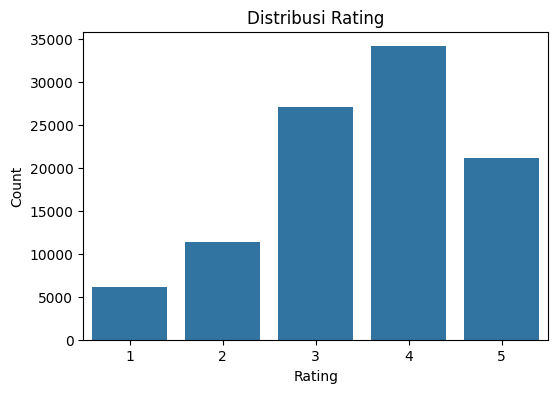

In [24]:
# Distribusi rating yang diberikan pengguna
plt.figure(figsize=(6, 4))
sns.countplot(x='rating', data=rating)
plt.title('Distribusi Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Insight :

- Pada data rating ini memiliki 100000 baris dan 4 kolom. Yang terdiri user_id (id pengguna), movie_id, rating, dan unix timestamp.
- Pada diagram rating diatas menunjukkan pengguna paling banyak memberikan rating 4, dan paling sedikit memberikan rating 1.
- Pada pengecekan nilai yang hilang, data rating tidak memiliki nilai yang hilang.

In [26]:
# Jumlah ulasan yang dibuat oleh pengguna
n_reviews_made_by_users = pd.DataFrame(
    rating['user_id'].value_counts().reset_index()
)
n_reviews_made_by_users.columns = ['user_id', 'n_reviews']
max_n_reviews = max(n_reviews_made_by_users['n_reviews'])
min_n_reviews = min(n_reviews_made_by_users['n_reviews'])

print(f"Total jumlah ulasan : {n_reviews_made_by_users['n_reviews'].sum()}")
print(f"Jumlah ulasan maksimum yang dibuat oleh seorang pengguna : {max_n_reviews}")
print(f"Jumlah ulasan minimum yang dibuat oleh seorang pengguna : {min_n_reviews}")

Total jumlah ulasan : 100000
Jumlah ulasan maksimum yang dibuat oleh seorang pengguna : 737
Jumlah ulasan minimum yang dibuat oleh seorang pengguna : 20


In [27]:
# Menampilkan 5 baris pertama dari dataframe n_reviews
n_reviews_made_by_users.head()

,user_id,n_reviews
0,405,737
1,655,685
2,13,636
3,450,540
4,276,518


## Data Preprocessing

### Menggabungkan kolom pada movie, selain movie_id, movie_title dan release_date, menjadi kolom genre

In [28]:
# Gabungkan one-hot genre ke bentuk list
genre_columns = ['unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy',
                 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
                 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

movie['genre'] = movie[genre_columns].apply(
    lambda row: [genre for genre in genre_columns if row[genre] == 1],
    axis=1
)

In [29]:
# Menghapus kolom one-hot genre
movie = movie.drop(columns=genre_columns)

In [30]:
movie.head()

,movie_id,movie_title,release_date,genre
0,1,Toy Story (1995),01-Jan-95,"[Animation, Children's, Comedy]"
1,2,GoldenEye (1995),01-Jan-95,"[Action, Adventure, Thriller]"
2,3,Four Rooms (1995),01-Jan-95,[Thriller]
3,4,Get Shorty (1995),01-Jan-95,"[Action, Comedy, Drama]"
4,5,Copycat (1995),01-Jan-95,"[Crime, Drama, Thriller]"


Insight :

Melakukan penggabungan kolom pada data movie selain kolom movie_id, movie_title, dan release_date menjadi kolom genre untuk mempersingkat data movie. Dan dapat tahu dalam satu film memiliki berapa genre. Sehingga sekarang pada data movie hanya memiliki 4 kolom saja.

### Pemeriksaan Data

In [31]:
# Melihat informasi dataset
print("Movie Info:")
print(movie.info())
print("\nDemografi Pengguna Info:")
print(demografi.info())
print("\nRating Info:")
print(rating.info())

Movie Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1271 entries, 0 to 1270
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie_id      1271 non-null   int64 
 1   movie_title   1271 non-null   object
 2   release_date  1270 non-null   object
 3   genre         1271 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.8+ KB
None

Demografi Pengguna Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None

Rating Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (tot

Pada informasi diatas, terdapat perbedaan jumlah pada data movie di kolom release_date yang harusnya 1271 data menjadi 1270, sehingga kolom tersebut ada yang kosong.

### Missing Values

In [32]:
# Mengisi missing values di Movie
movie['release_date'] = movie['release_date'].fillna('Unknown')

# Memeriksa missing values
print(movie.isnull().sum())
print(demografi.isnull().sum())
print(rating.isnull().sum())

movie_id        0
movie_title     0
release_date    0
genre           0
dtype: int64
user_id       0
age           0
gender        0
occupation    0
zip_code      0
dtype: int64
user_id           0
movie_id          0
rating            0
unix_timestamp    0
dtype: int64


In [33]:
# Membuat dictionary untuk data ‘movie_id’, ‘movie_title, dan ‘genre’
movie_new = movie[['movie_id', 'movie_title', 'genre']].copy()

In [34]:
movie_new

,movie_id,movie_title,genre
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,GoldenEye (1995),"[Action, Adventure, Thriller]"
2,3,Four Rooms (1995),[Thriller]
3,4,Get Shorty (1995),"[Action, Comedy, Drama]"
4,5,Copycat (1995),"[Crime, Drama, Thriller]"
...,...,...,...
1266,1678,Mat' i syn (1997),[Drama]
1267,1679,B. Monkey (1998),"[Romance, Thriller]"
1268,1680,Sliding Doors (1998),"[Drama, Romance]"
1269,1681,You So Crazy (1994),[Comedy]


### Mengelompokkan berdasarkan Demografi Pengguna

In [35]:
# Mengelompokkan berdasarkan 'user_id' dan menghitung jumlahnya secara agregat
grouped_users = rating.groupby('user_id').agg({
    'movie_id': 'count',          # Menghitung jumlah film yang diberi rating oleh setiap pengguna
    'rating': 'mean'     # Menghitung rata-rata rating yang diberikan oleh setiap pengguna
}).reset_index()

# Mengubah nama kolom agar lebih jelas
grouped_users.columns = ['User_id', 'Total Film yang Dinilai', 'Rata-rata Rating']

# Menampilkan beberapa baris pertama
grouped_users.sample(3)

,User_id,Total Film yang Dinilai,Rata-rata Rating
478,479,202,3.420792
412,413,50,3.660000
132,133,26,3.192308


### Mengelompokkan berdasarkan Movie

In [36]:
# Mengelompokkan berdasarkan 'movie_id' dan menjumlahkannya
grouped_movies = rating.groupby('movie_id').agg({
    'user_id' : 'count',
    'rating' : 'mean'
}).reset_index()

# Mengganti nama kolom agar lebih jelas
grouped_movies.columns = ['Movie_id', 'Total Pengguna yang Memberi Penilaian', 'Rata-rata Rating']
grouped_movies.sample(3)

,Movie_id,Total Pengguna yang Memberi Penilaian,Rata-rata Rating
1388,1389,3,3.000000
336,337,18,3.000000
297,298,194,3.768041


## Data Preparation

In [37]:
# Membaca Dataset
df = rating
df

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


### Encode user_id

In [38]:
# Mengubah User_id menjadi list tanpa nilai yang sama
user_ids = rating['user_id'].unique().tolist()
print('list user_id: ', user_ids)

# Melakukan encoding User_id
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded user_id : ', user_to_user_encoded)

# Melakukan proses encoding angka ke User_id
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke user_id: ', user_encoded_to_user)

list user_id:  [196, 186, 22, 244, 166, 298, 115, 253, 305, 6, 62, 286, 200, 210, 224, 303, 122, 194, 291, 234, 119, 167, 299, 308, 95, 38, 102, 63, 160, 50, 301, 225, 290, 97, 157, 181, 278, 276, 7, 10, 284, 201, 287, 246, 242, 249, 99, 178, 251, 81, 260, 25, 59, 72, 87, 42, 292, 20, 13, 138, 60, 57, 223, 189, 243, 92, 241, 254, 293, 127, 222, 267, 11, 8, 162, 279, 145, 28, 135, 32, 90, 216, 250, 271, 265, 198, 168, 110, 58, 237, 94, 128, 44, 264, 41, 82, 262, 174, 43, 84, 269, 259, 85, 213, 121, 49, 155, 68, 172, 19, 268, 5, 80, 66, 18, 26, 130, 256, 1, 56, 15, 207, 232, 52, 161, 148, 125, 83, 272, 151, 54, 16, 91, 294, 229, 36, 70, 14, 295, 233, 214, 192, 100, 307, 297, 193, 113, 275, 219, 218, 123, 158, 302, 23, 296, 33, 154, 77, 270, 187, 170, 101, 184, 112, 133, 215, 69, 104, 240, 144, 191, 61, 142, 177, 203, 21, 197, 134, 180, 236, 263, 109, 64, 114, 239, 117, 65, 137, 257, 111, 285, 96, 116, 73, 221, 235, 164, 281, 182, 129, 45, 131, 230, 126, 231, 280, 288, 152, 217, 79, 75, 2

### Encode movie_id

In [39]:
# Mengubah movie_id menjadi list tanpa nilai yang sama
movie_ids = rating['movie_id'].unique().tolist()

# Melakukan proses encoding movie_id
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}

# Melakukan proses encoding angka ke movie_id
movie_encoded_to_book = {i: x for i, x in enumerate(movie_ids)}

### Mapping Hasil Encoding ke DataFrame

In [40]:
# Mapping user_id ke dataframe user
rating['user'] = rating['user_id'].map(user_to_user_encoded)

# Mapping movie_id ke dataframe movie
rating['movie'] = rating['movie_id'].map(movie_to_movie_encoded)

In [41]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah movie
num_movie = len(movie_encoded_to_book)
print(num_movie)

# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df['rating'])

# Nilai maksimal rating
max_rating = max(df['rating'])

print('Jumlah Pengguna: {}, Jumlah Film: {}, Rating Minimum: {}, Rating Maksimum: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

943
1682
Jumlah Pengguna: 943, Jumlah Film: 1682, Rating Minimum: 1.0, Rating Maksimum: 5.0


### Membagi Data untuk Training dan Validasi

In [42]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,user_id,movie_id,rating,unix_timestamp,user,movie
75721,877,381,4.0,882677345,873,377
80184,815,602,3.0,878694269,808,601
19864,94,431,4.0,891721716,90,354
76699,416,875,2.0,876696938,409,570
92991,500,182,2.0,883873556,496,356
...,...,...,...,...,...,...
6265,216,231,2.0,880245109,81,146
54886,343,276,5.0,876403078,339,695
76820,437,475,3.0,880140288,434,355
860,284,322,3.0,885329671,40,51


In [43]:
# Membuat variabel x untuk mencocokkan data user dan movie menjadi satu value
x = df[['user', 'movie']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[873 377]
 [808 601]
 [ 90 354]
 ...
 [434 355]
 [ 40  51]
 [ 70 113]] [0.75 0.5  0.75 ... 0.5  0.5  0.5 ]


## Model Development dengan Collaborative Filtering

### Proses Training

In [44]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings movie
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding movie bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)

    x = dot_user_movie + user_bias + movie_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [45]:
model = RecommenderNet(num_users, num_movie, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [46]:
# Memulai training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 30,
    validation_data = (x_val, y_val)
)

Epoch 1/30
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 0.6558 - root_mean_squared_error: 0.2796 - val_loss: 0.6207 - val_root_mean_squared_error: 0.2492
Epoch 2/30
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - loss: 0.6135 - root_mean_squared_error: 0.2430 - val_loss: 0.6142 - val_root_mean_squared_error: 0.2430
Epoch 3/30
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 0.6077 - root_mean_squared_error: 0.2372 - val_loss: 0.6125 - val_root_mean_squared_error: 0.2412
Epoch 4/30
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 0.6056 - root_mean_squared_error: 0.2351 - val_loss: 0.6131 - val_root_mean_squared_error: 0.2416
Epoch 5/30
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 0.6041 - root_mean_squared_error: 0.2333 - val_loss: 0.6139 - val_root_mean_squared_error: 0.2422
Epoch 6/30
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 0.6031 - root_mean_squared_error: 0.2329 - val_loss: 0.6138 - val_root_mean_squared_error: 0.2419
Epoch 7/30
10000/10000

## Evaluasi dan Visualisasi

In [47]:
y_pred = model.predict(x_val)

from sklearn.metrics import mean_squared_error
import numpy as np

# Menghitung RMSE manual
rmse_manual = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Manual RMSE: {rmse_manual}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Manual RMSE: 0.2660106311287555


In [48]:
# Evaluasi model menggunakan data validasi
loss, rmse = model.evaluate(x_val, y_val, verbose=1)

print(f"Loss (BinaryCrossentropy): {loss}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6493 - root_mean_squared_error: 0.2672
Loss (BinaryCrossentropy): 0.6473422050476074
Root Mean Squared Error (RMSE): 0.26601067185401917


## Visualisasi Metrik

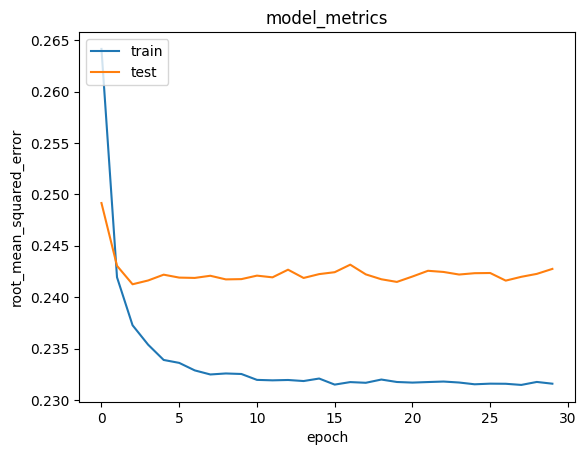

In [49]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Mendapatkan Rekomendasi Movie (Film)

In [50]:
movie_df = movie_new
df = pd.read_csv('ratings.csv')

# Mengambil sample user
user_id = df.user_id.sample(1).iloc[0]
movie_visited_by_user = df[df.user_id == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
movie_not_visited = movie_df[~movie_df['movie_id'].isin(movie_visited_by_user.movie_id.values)]['movie_id']
movie_not_visited = list(
    set(movie_not_visited)
    .intersection(set(movie_to_movie_encoded.keys()))
)

movie_not_visited = [[movie_to_movie_encoded.get(x)] for x in movie_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_visited), movie_not_visited)
)

In [51]:
ratings = model.predict(user_movie_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_to_movie_encoded.get(movie_not_visited[x][0]) for x in top_ratings_indices
]

print('Menampilkan rekomendasi untuk pengguna: {}'.format(user_id))
print('===' * 9)
print('Movie dengan rating tinggi dari pengguna')
print('----' * 8)

top_movie_user = (
    movie_visited_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movie_id.values
)

movie_df_rows = movie_df[movie_df['movie_id'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.movie_title, ':', row.genre)

print('----' * 8)
print('Top 10 rekomendasi movie')
print('----' * 8)

recommended_movie = movie_df[movie_df['movie_id'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.movie_title, ':', row.genre)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Menampilkan rekomendasi untuk pengguna: 268
Movie dengan rating tinggi dari pengguna
--------------------------------
Star Wars (1977) : ['Action', 'Adventure', 'Romance', 'Sci-Fi', 'War']
Three Colors: Blue (1993) : ['Drama']
Unforgiven (1992) : ['Western']
Chasing Amy (1997) : ['Drama', 'Romance']
--------------------------------
Top 10 rekomendasi movie
--------------------------------
Naked Gun 33 1/3: The Final Insult (1994) : ['Comedy']
Bad Company (1995) : ['Action']
Eye for an Eye (1996) : ['Drama', 'Thriller']
Six Degrees of Separation (1993) : ['Drama', 'Mystery']
Boy's Life 2 (1997) : ['Drama']
Raw Deal (1948) : ['Film-Noir']
Santa with Muscles (1996) : ['Comedy']
